<a href="https://colab.research.google.com/github/adeoluafo/FDSDE_AAfolabi/blob/main/classDemo/AdeoluwaAfolabi_clustering_building_km_demo_10_16_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import missingno as msno
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [ ]:
url = "https://www1.nyc.gov/html/gbee/downloads/excel/nyc_benchmarking_disclosure_2017_consumption_data.xlsx"
df = pd.read_excel(url, "Information and Metrics")

In [ ]:
features = df[["Year Built", "Electricity Use - Grid Purchase (kBtu)"]]
features

,Year Built,Electricity Use - Grid Purchase (kBtu)
0,1909,6551394.1
1,1963,616343.7
2,1999,8033914.4
3,1994,1976691.9
4,2012,1022951.6
...,...,...
34350,1931,316524.4
34351,1925,277672.0
34352,1926,629677.8
34353,1910,6979300.9


In [ ]:
initial_shape = features.shape
initial_shape

(34355, 2)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34355 entries, 0 to 34354
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year Built                              34355 non-null  int64  
 1   Electricity Use - Grid Purchase (kBtu)  31576 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 536.9 KB


<Axes: >

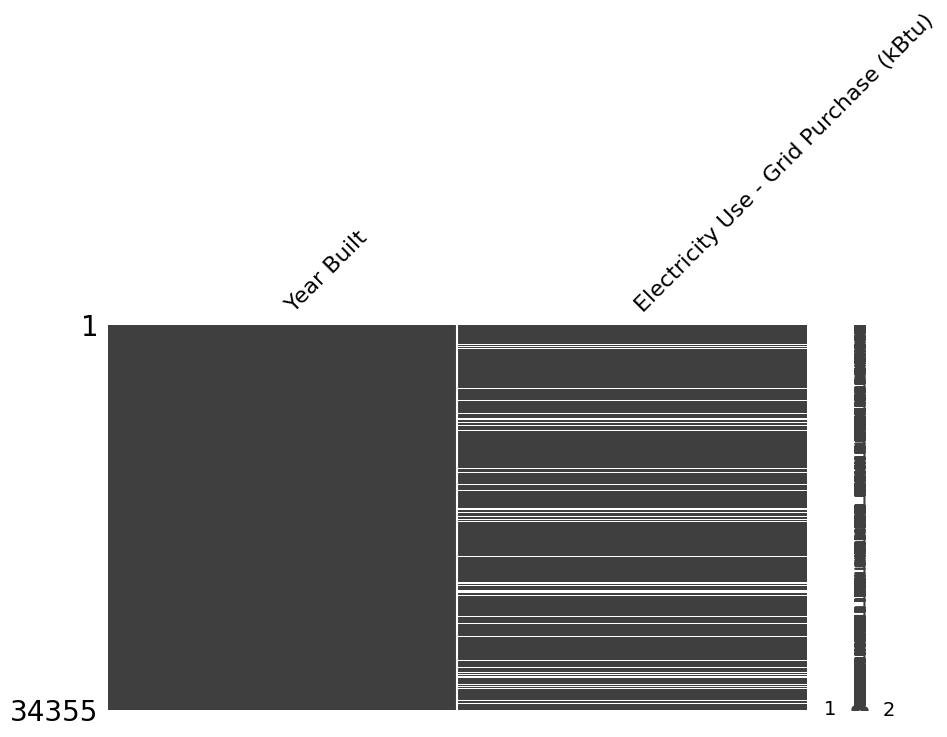

In [ ]:
msno.matrix(features, figsize=(10,5))

In [ ]:
features.dropna(inplace=True)
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31576 entries, 0 to 34354
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year Built                              31576 non-null  int64  
 1   Electricity Use - Grid Purchase (kBtu)  31576 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 740.1 KB


<ipython-input-7-97be9f7e6bb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace=True)


In [ ]:
features.describe()

,Year Built,Electricity Use - Grid Purchase (kBtu)
count,31576.000000,3.157600e+04
mean,1945.994141,3.833599e+06
std,32.791648,1.249719e+07
min,1051.000000,-6.343300e+03
25%,1924.000000,6.888429e+05
50%,1935.000000,1.249026e+06
75%,1964.000000,2.828563e+06
max,2021.000000,5.742834e+08


In [ ]:
features = features[features["Year Built"] > 1900]
features = features[features["Electricity Use - Grid Purchase (kBtu)"] > 0]
features.shape

(30256, 2)

array([[<Axes: title={'center': 'Year Built'}>,
        <Axes: title={'center': 'Electricity Use - Grid Purchase (kBtu)'}>]],
      dtype=object)

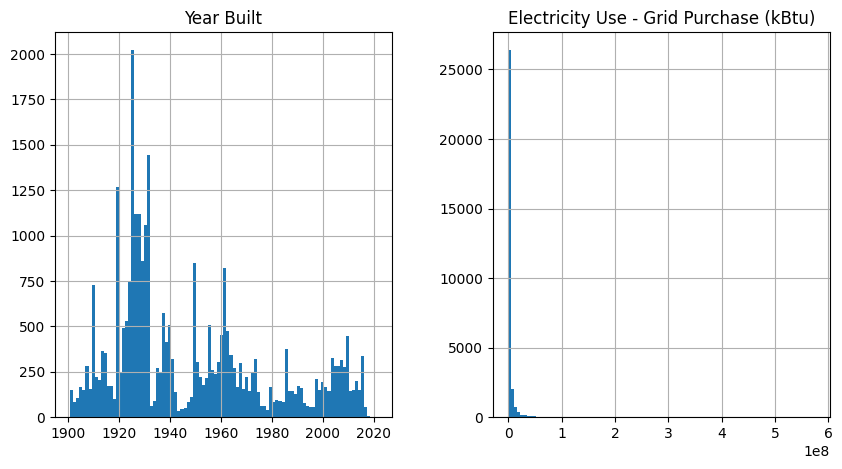

In [ ]:
features.hist(figsize=(10,5), bins=100)

In [ ]:
year_col = "Year Built"
elec_col = "Electricity Use - Grid Purchase (kBtu)"

features[elec_col] = np.log(features[elec_col])

array([[<Axes: title={'center': 'Year Built'}>,
        <Axes: title={'center': 'Electricity Use - Grid Purchase (kBtu)'}>]],
      dtype=object)

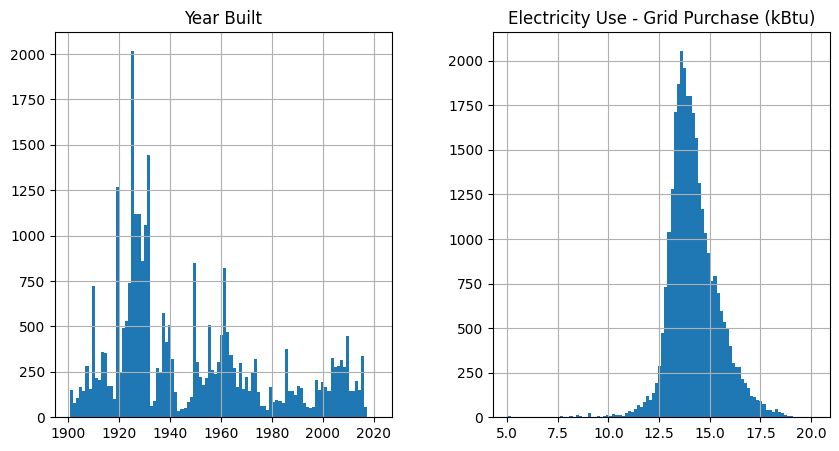

In [ ]:
features.hist(figsize=(10,5), bins=100)

<Axes: xlabel='Year Built', ylabel='Electricity Use - Grid Purchase (kBtu)'>

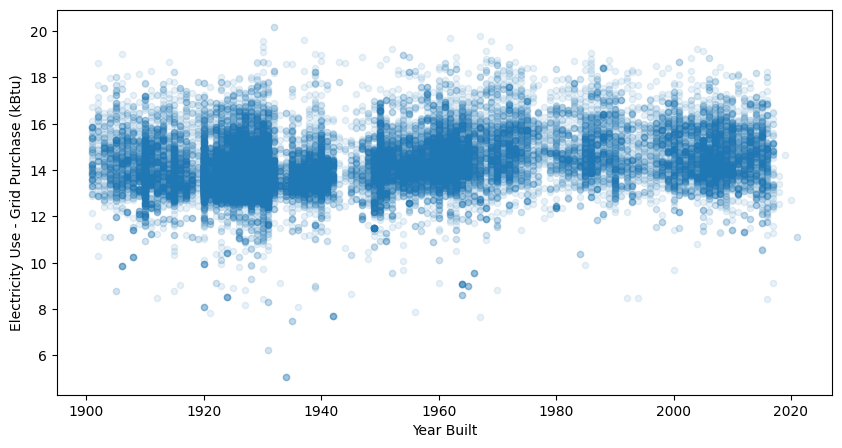

In [ ]:
features.plot(year_col, elec_col, kind="scatter", alpha=0.1, figsize=(10,5))

In [ ]:
km = KMeans(n_clusters=7, random_state = 4455, verbose=True)
km.fit(features)

Initialization complete
Iteration 0, inertia 1021065.0636304695.
Iteration 1, inertia 672147.7621495109.
Iteration 2, inertia 640545.1019476859.
Iteration 3, inertia 623969.9174912382.
Iteration 4, inertia 618903.2678904769.
Iteration 5, inertia 616720.6994051401.
Converged at iteration 5: center shift 0.041173184001308094 within tolerance 0.0469566454278962.


KMeans(n_clusters=7, random_state=4455, verbose=True)

In [ ]:
km.n_clusters

7

In [ ]:
km.cluster_centers_

array([[1921.98351997,   13.85594992],
       [1986.53013764,   14.93552835],
       [1964.08647799,   14.62507651],
       [1946.31074708,   14.02986518],
       [2007.20440669,   14.63479929],
       [1909.61806495,   14.14281318],
       [1929.562566  ,   13.85493305]])

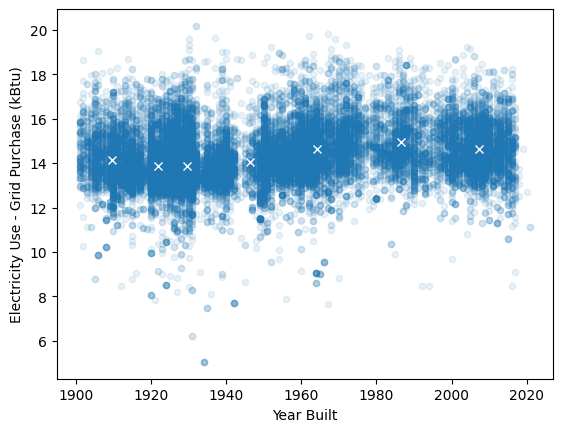

In [ ]:
features.plot(year_col, elec_col, kind = "scatter", alpha=0.1)
for i in range(km.n_clusters):
    x = km.cluster_centers_[i, 0]
    y = km.cluster_centers_[i, 1]
    plt.plot(x, y, "wx")

In [ ]:
km.labels_

array([5, 2, 4, ..., 6, 5, 1], dtype=int32)

Text(0, 0.5, 'Electricity use [kBtu]')

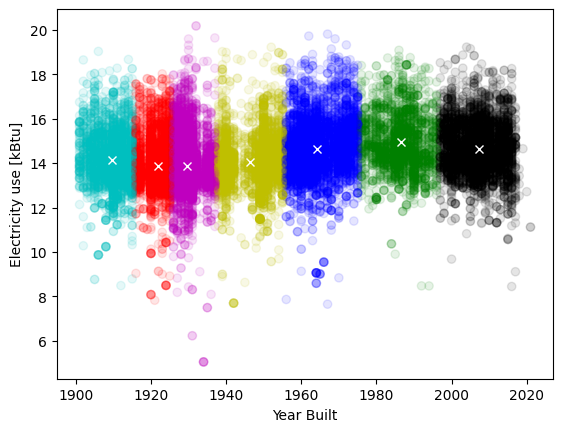

In [ ]:
colors = np.array(["r", "g", "b", "y", "k", "c", "m"])
plt.scatter(features[year_col], features[elec_col], color = colors[km.labels_],
            alpha=0.1)
for i in range(km.n_clusters):
    x = km.cluster_centers_[i, 0]
    y = km.cluster_centers_[i, 1]
    plt.plot(x, y, "wx")
plt.xlabel("Year Built")
plt.ylabel("Electricity use [kBtu]")

#plt.axis("equal")

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30256 entries, 0 to 34354
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year Built                              30256 non-null  int64  
 1   Electricity Use - Grid Purchase (kBtu)  30256 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 709.1 KB


In [ ]:
features[year_col] = features[year_col].astype(float)
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30256 entries, 0 to 34354
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year Built                              30256 non-null  float64
 1   Electricity Use - Grid Purchase (kBtu)  30256 non-null  float64
dtypes: float64(2)
memory usage: 709.1 KB


In [ ]:
features.describe()

,Year Built,Electricity Use - Grid Purchase (kBtu)
count,30256.000000,30256.000000
mean,1948.098262,14.208372
std,30.621603,1.217110
min,1901.000000,5.056246
25%,1925.000000,13.451293
50%,1937.000000,14.036847
75%,1966.000000,14.850849
max,2021.000000,20.168634


In [ ]:
features_scaled = preprocessing.scale(features.values, axis=0)
features_scaled

array([[-1.27684064,  1.22161645],
       [ 0.4866494 , -0.72041704],
       [ 1.66230942,  1.38922453],
       ...,
       [-0.72166785, -0.70283123],
       [-1.24418342,  1.27360186],
       [ 0.97650774,  0.57344184]])

In [ ]:
features_scaled_df = pd.DataFrame(features_scaled, columns=[year_col, elec_col])
features_scaled_df.describe()

,Year Built,Electricity Use - Grid Purchase (kBtu)
count,3.025600e+04,3.025600e+04
mean,5.147771e-16,-8.266494e-16
std,1.000017e+00,1.000017e+00
min,-1.538098e+00,-7.519683e+00
25%,-7.543251e-01,-6.220408e-01
50%,-3.624384e-01,-1.409301e-01
75%,5.846211e-01,5.278800e-01
max,2.380768e+00,4.897144e+00


array([[<Axes: title={'center': 'Year Built'}>,
        <Axes: title={'center': 'Electricity Use - Grid Purchase (kBtu)'}>]],
      dtype=object)

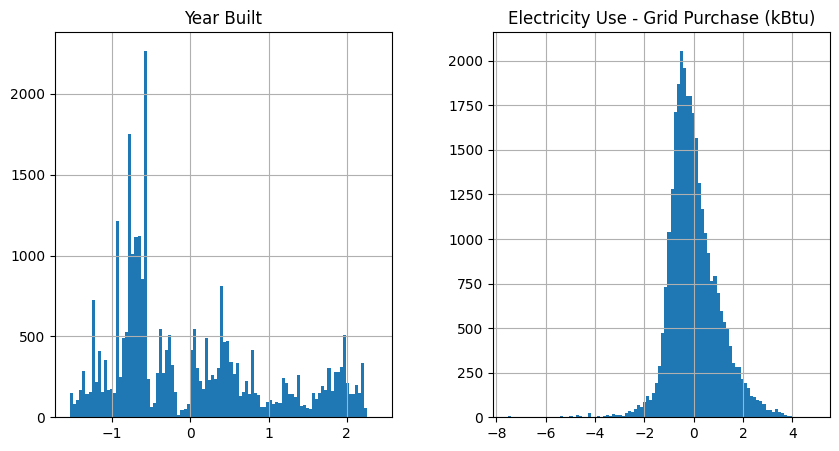

In [ ]:
features_scaled_df.hist(figsize=(10,5), bins=100)

In [ ]:
km = KMeans(n_clusters=7, random_state = 4455, verbose=True)
km.fit(features_scaled_df)

Initialization complete
Iteration 0, inertia 14029.304244766052.
Iteration 1, inertia 11978.835667651056.
Iteration 2, inertia 11310.261592986248.
Iteration 3, inertia 11115.291747163215.
Iteration 4, inertia 11051.771725125776.
Iteration 5, inertia 11033.26660877007.
Iteration 6, inertia 11026.433709343111.
Iteration 7, inertia 11023.708308354322.
Iteration 8, inertia 11022.626423014655.
Iteration 9, inertia 11021.5362283997.
Iteration 10, inertia 11020.127381219134.
Iteration 11, inertia 11019.306753502235.
Iteration 12, inertia 11018.306915953817.
Iteration 13, inertia 11017.6767454711.
Converged at iteration 13: center shift 8.275124384051658e-05 within tolerance 0.00010000000000000373.


KMeans(n_clusters=7, random_state=4455, verbose=True)

Text(0, 0.5, 'Electricity use [kBtu]')

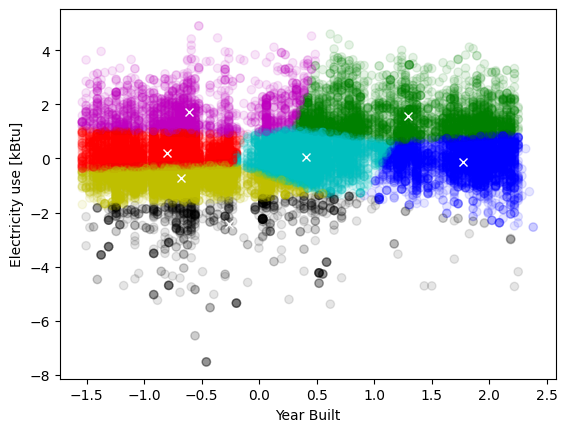

In [ ]:
colors = np.array(["r", "g", "b", "y", "k", "c", "m"])
plt.scatter(features_scaled_df[year_col], features_scaled_df[elec_col],
            color = colors[km.labels_],alpha=0.1)
for i in range(km.n_clusters):
    x = km.cluster_centers_[i, 0]
    y = km.cluster_centers_[i, 1]
    plt.plot(x, y, "wx")
plt.xlabel("Year Built")
plt.ylabel("Electricity use [kBtu]")